# SyriaTel Customer Churn Modeling Project
**Author:** Brian Amani

## Project Overview
***

This project focuses on developing a model to predict whether a customer is likely to churn from SyriaTel, a telecommunications company. The goal is to help SyriaTel reduce churn by identifying high-risk customers and applying targeted retention strategies. By analyzing customer data, the model provides actionable insights to stakeholders aiming to minimize churn and prevent revenue loss. The results enable SyriaTel to identify at-risk customers and take proactive steps to retain them, supporting efforts to improve customer loyalty and profitability. Specifically, the analysis indicates that SyriaTel should:


## Business Understanding
***

Customer churn poses a significant challenge, as it leads to revenue loss and increased expenses for acquiring new customers. In an industry where retaining customers is key to financial success, minimizing churn becomes a top priority. The aim is to detect early signs of customer departure by analyzing behavior patterns, which helps predict churn and allows SyriaTel to engage at-risk customers with specific retention tactics.

## Data Understanding
***

The provided dataset contains detailed information about SyriaTel customers, including features related to customer behavior, demographics, and service usage. It also features a mix of numerical and categorical variables
- There are 3,333 entries and 21 columns, the dataset includes variables such as account length, international plan, total day minutes, and customer service calls. 
- The target variable is binary. This can be explained as: If a customer has churned (True) & if a customer has not churned (False). 


## Data Analysis & Preparation
***

Importing important libraries and performing EDA

In [134]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("churn_data.csv")

# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Further analysis of our data frame info

In [135]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

(3333, 21)

### Variable Descriptions
Based on domain knowledge.

* **state:** Categorical variable indicating the customer's state.
* **account length:** Numeric variable indicating the length of the customer account.
* **area code:** Numeric variable indicating the area code of the customer.
* **phone number:** Categorical variable representing the customers number.
* **international plan:** Categorical variable indicating if the customer has an international plan.
* **voice mail plan:** Categorical variable indicating if the customer has a voicemail plan.
* **number vmail messages:** Numeric variable indicating the number of voicemail messages.
* **total day/eve/night/intl minutes:** Numeric variables indicating usage minutes in various time segments.
* **total day/eve/night/intl calls:** Numeric variables indicating the number of calls in various time segments.
* **total day/eve/night/intl charge:** Numeric variables indicating charges in various time segments.
* **customer service calls:** Numeric variable indicating the number of customer service calls made by the customer.
* **churn:** Binary target variable indicating customer churn (True/False).

Conducting churn analysis

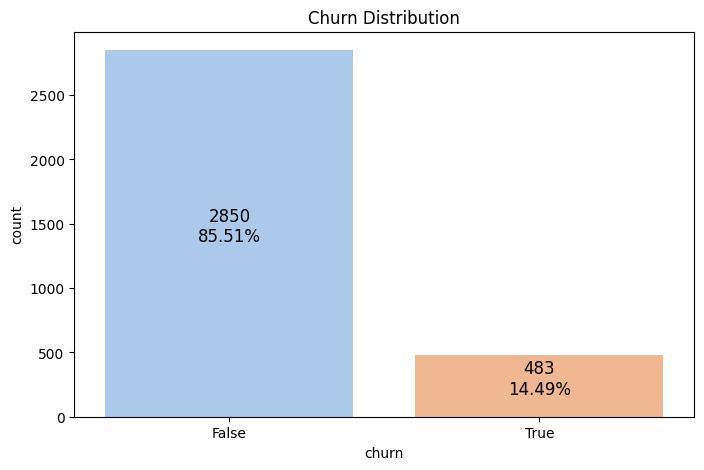

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot for the churn variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='churn', data=df, palette='pastel')

# Add counts and percentages inside the bars
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    height = p.get_height()
    count = int(p.get_height())
    ax.annotate(f'{count}\n{percentage}', (p.get_x() + p.get_width() / 2., p.get_height() / 2.) ,
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
# Display the plot
plt.title('Churn Distribution')
plt.show()


### Showing Distributions

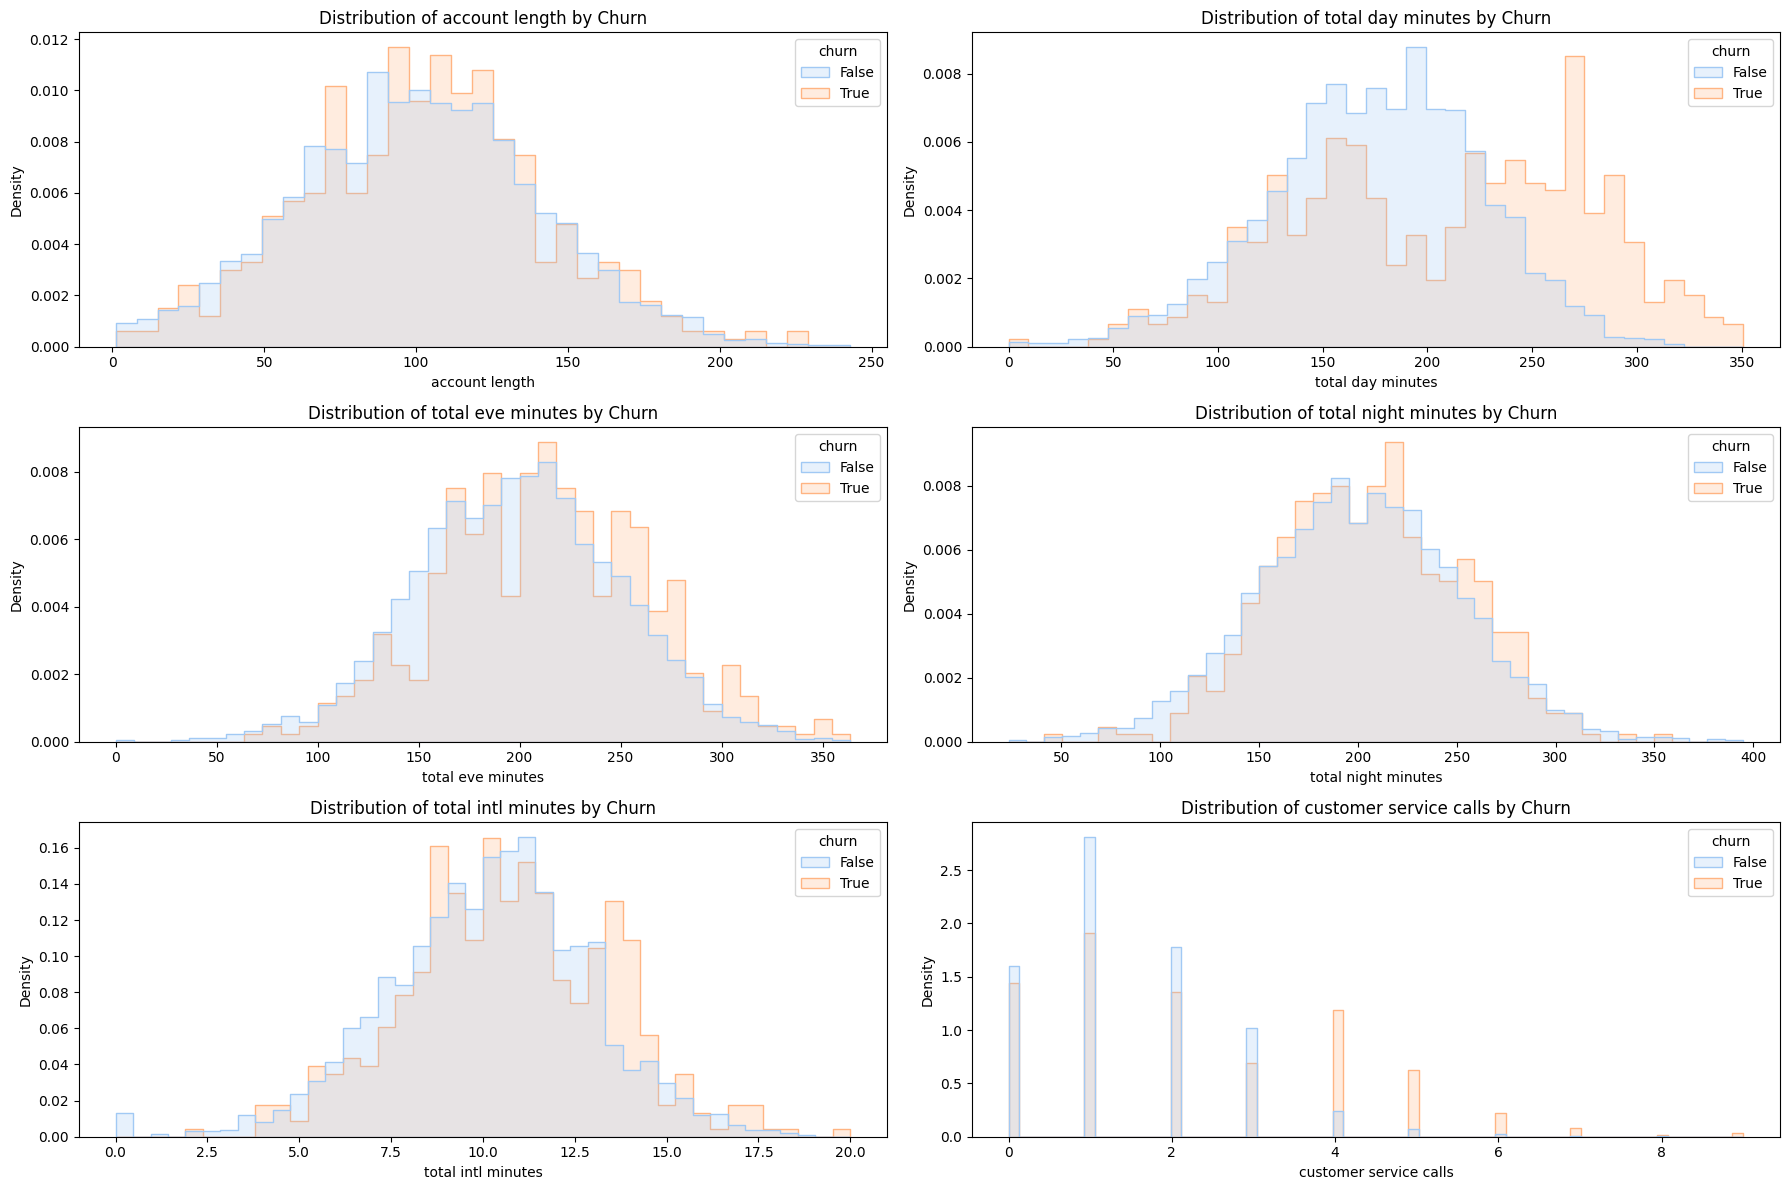

In [137]:
#Numerical features
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']

#Plotting Distributions for churn and non-churn customers
plt.figure(figsize=(18, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='churn', element='step', stat='density', common_norm=False, palette='pastel')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Commenting on churn and distribution plots

**Churn Balance:** The count plot shows an imbalanced data set with fewer customers labeled as churned, (True), 483 (14.49%) compared unchurned, (False), 2,850 (85.51%).

**Distribution plot insights** The distribution plots show that customers with higher total day minutes and more frequent customer service calls are more likely to churn, suggesting possible dissatisfaction among heavy daytime users and those with ongoing service issues.


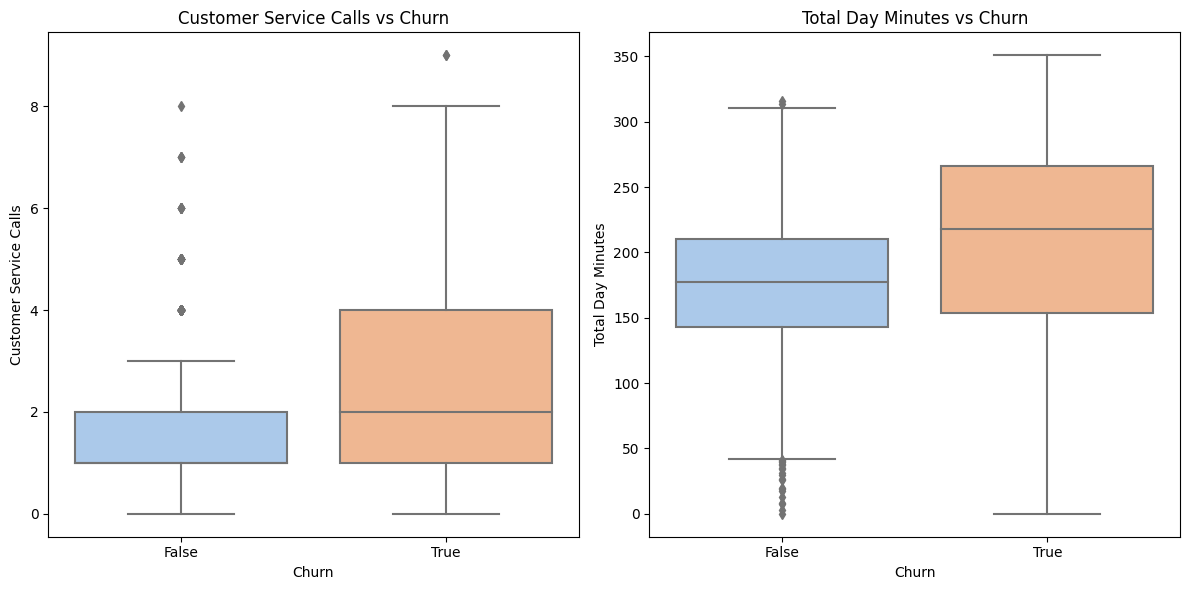

In [138]:
#Analysing Customer service calls and total day minutes
plt.figure(figsize=(12, 6))

# Subplot 1: Customer Service Calls vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='customer service calls', data=df, palette='pastel')
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

# Subplot 2: Total Day Minutes vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='total day minutes', data=df, palette='pastel')
plt.title('Total Day Minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')

# Adjust the layout
plt.tight_layout()
plt.show()

The plots above show that frequent customer service calls and high daytime usage are linked to a greater likelihood of churn, as evidenced by their higher median values.

## Analysing International Plan and Voice Mail Plan vs churn

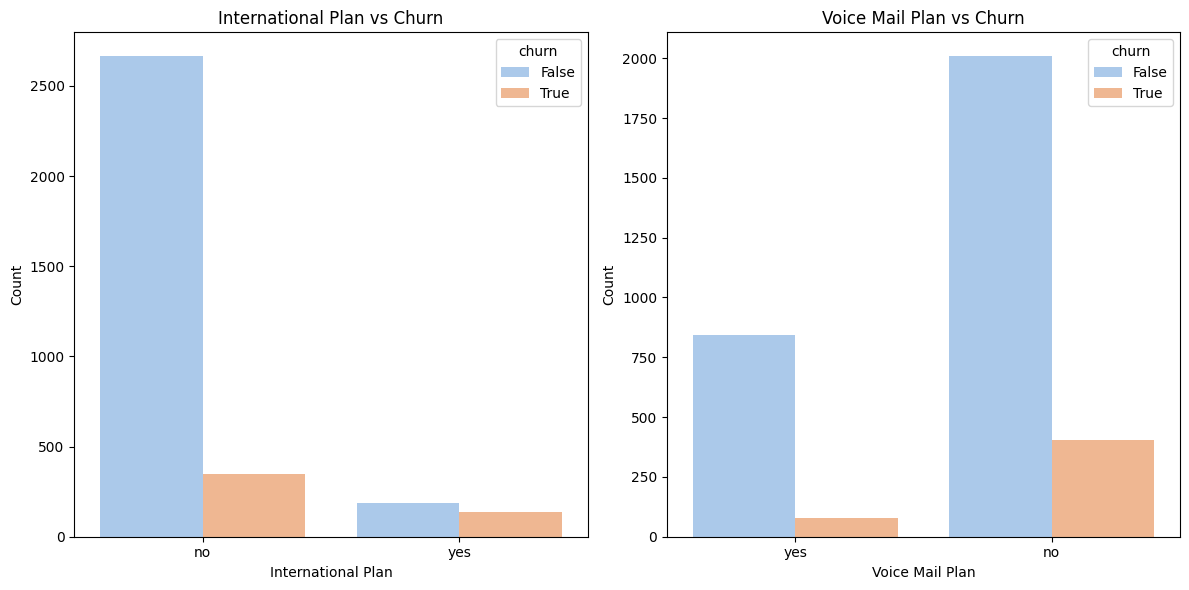

In [139]:
plt.figure(figsize=(12, 6))

# Subplot 1: International Plan vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df, palette='pastel')
plt.title('International Plan vs Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Subplot 2: Voice Mail Plan vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='pastel')
plt.title('Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

The plots above suggest that the international plan may be a factor contributing to customer dissatisfaction, as it seems to correlate with higher churn rates.

In contrast, the voice mail plan appears to have a positive impact on customer retention. 

This indicates that refining the international plan and utilizing the voice mail plan more effectively in retention strategies could be key areas for SyriaTel to focus on in reducing churn.

I will continue further analysis to explore additional insights

# Using Correlation matrix for further analysis of numerical variables

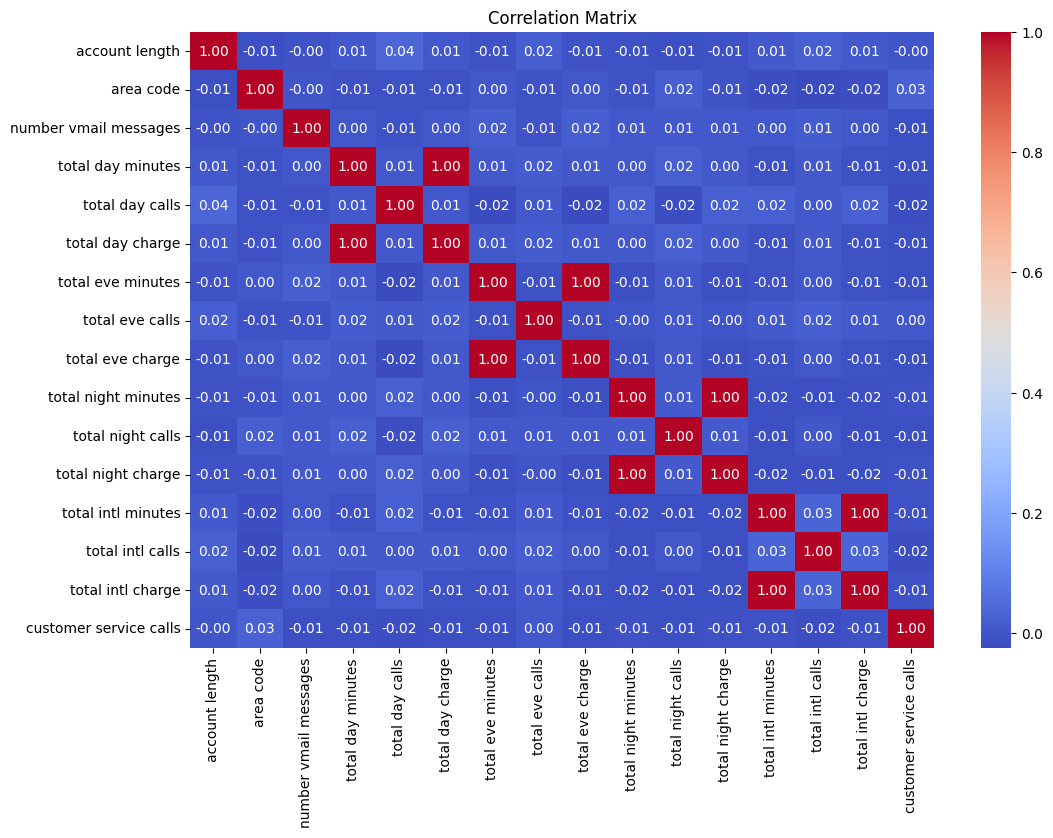

In [140]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix shows that for the most part, the numeric variables in the data set are independent. Let us now analyse the categorical variables

# Analysing the categorical variables

In [141]:
# Chi-Square Test Function
def chi_square_test(feature):
    contingency_table = pd.crosstab(df[feature], df['churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p}")
    print("-----\n")

# Perform Chi-Square Test for 'state' and 'area code'
chi_square_test('state')
chi_square_test('area code')

Chi-Square Test for state:
Chi2: 83.04379191019663
P-value: 0.002296221552011188
-----

Chi-Square Test for area code:
Chi2: 0.17754069117425395
P-value: 0.9150556960243712
-----



The test reveals that there is statistical significance between a customer's state of residence and their likelihood of churning (p-value 0.002)
In contrast, there is no statistical significance between their area code and likelihood of churning (p-value 0.915)

Syriatel sould therefore target strategies that factor in the places of residence of their customers to enhance retention.

Analysing Churn by State of residence

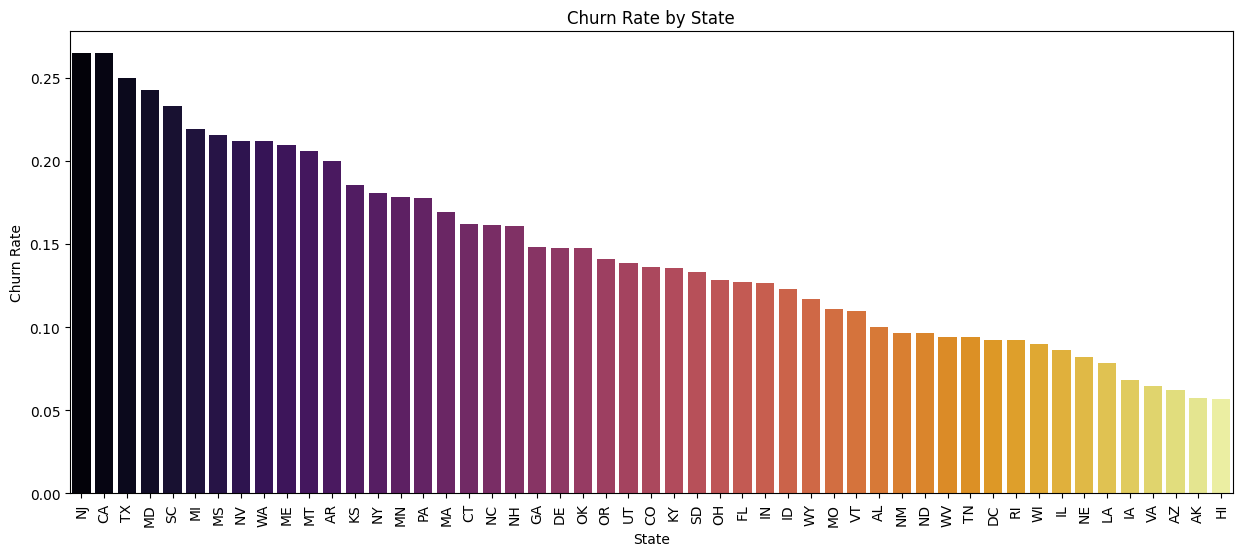

In [142]:
# Plot churn rate by state
plt.figure(figsize=(15, 6))
state_churn = df.groupby('state')['churn'].mean().sort_values(ascending=False)
sns.barplot(x=state_churn.index, y=state_churn.values, palette= 'inferno')
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

The plot shows a significant decline in churn rate by state from left to right. This is indicative that the state has an effect on churn rate.

### Now that we are done with initial analysis, I shall move to feature selection as preparation for later modelling

## Feature Selection & Preprocessing
***

In [143]:
# Drop the irrelevant and redundant columns
new_df = df.drop(columns=[
    'phone number', 
    'area code', 
    'total day charge', 
    'total eve charge', 
    'total night charge', 
    'total intl charge',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls'
])

# Display the first few rows of the updated dataframe and its shape
new_df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,churn
0,KS,128,no,yes,25,265.1,197.4,244.7,10.0,1,False
1,OH,107,no,yes,26,161.6,195.5,254.4,13.7,1,False
2,NJ,137,no,no,0,243.4,121.2,162.6,12.2,0,False
3,OH,84,yes,no,0,299.4,61.9,196.9,6.6,2,False
4,OK,75,yes,no,0,166.7,148.3,186.9,10.1,3,False


In [144]:
# Separate the features (X) and target (y)
X = new_df.drop(columns=['churn'])
y = new_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 10), (667, 10), (2666,), (667,))

In [145]:
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.columns.difference(categorical_features)

# Set up OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit the encoder on training set (X_train) and transform training and test sets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert encoded features to DataFrames (easier concatenation)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index to align with numerical features
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# Concatenate numerical features with encoded categorical features
X_train_final = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

X_train_final.head()

,account length,customer service calls,number vmail messages,total day minutes,total eve minutes,total intl minutes,total night minutes,state_AL,state_AR,state_AZ,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
817,243,2,0,95.5,163.7,6.6,264.2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,4,0,112.0,193.7,4.1,208.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,222.4,327.0,8.7,208.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,141,1,0,126.9,180.0,8.0,140.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,216.3,266.3,4.5,214.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can move to modelling iterating from simple linear regression with increasing complexity

## Data Modelling
***

1. Logistic Regression - Model 1

In [146]:
# Initializing model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train_final, y_train)

# Making predictions
y_pred = log_reg.predict(X_test_final)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying evaluation scores
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8590704647676162
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.61      0.20      0.30       101

    accuracy                           0.86       667
   macro avg       0.74      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



c:\Users\Amani\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Generating and plotting confusion matrix

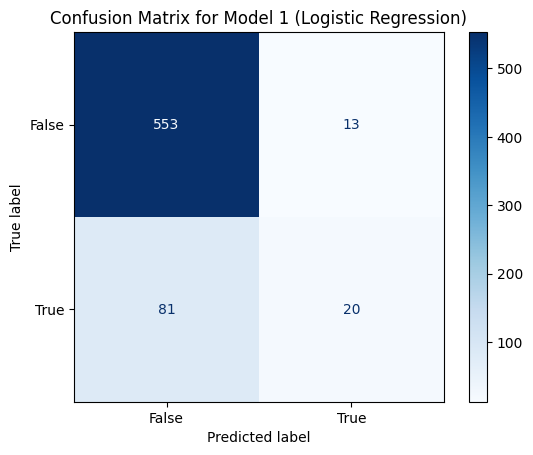

In [147]:
# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plotting confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 1 (Logistic Regression)")
plt.show()

ROC score & curve

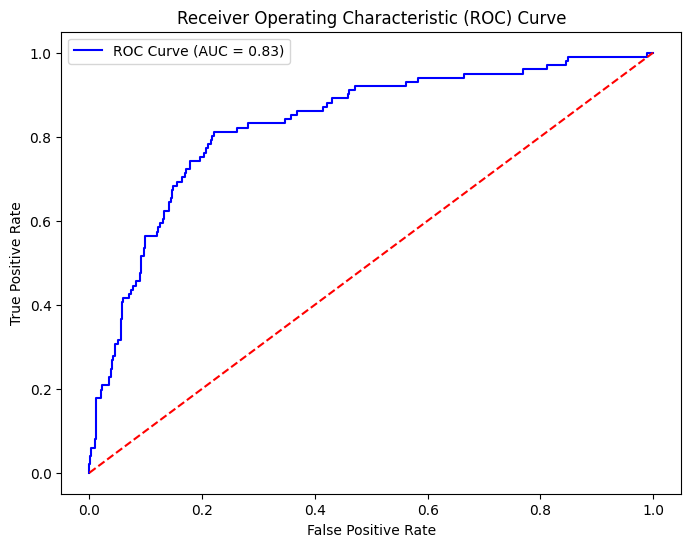

In [148]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- The model is highly effective at predicting the non-churn class (False), with excellent recall (0.98) and precision (0.87).
- The model struggles significantly with the churn class (True), achieving a very low recall of 0.20, meaning it misses most churners.
- The AUC score of 0.83 (83%) is good because it shows the model's ability to distinguish the classes.

Impact on the Syriatel business:
- The business impact is significant because failing to predict churners can lead to preventable customer losses.

Next steps: Improve the recall for churn prediction by attempting a more tuned model

## Model 2: Using SMOTE to improve the model

In [149]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Initialize and train a new Logistic Regression model on the resampled data
log_reg_balanced = LogisticRegression(random_state=42, max_iter=1000)
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred_balanced = log_reg_balanced.predict(X_test_final)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

# Display the evaluation scores
print(f"Accuracy: {accuracy_balanced}")
print("Classification Report:\n", report_balanced)


Accuracy: 0.7661169415292354
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.77      0.85       566
        True       0.37      0.76      0.50       101

    accuracy                           0.77       667
   macro avg       0.66      0.76      0.67       667
weighted avg       0.86      0.77      0.79       667



There are now significant improvements in recall for the True (churn) class but at the cost of reduced precision and overall accuracy.
- Improved churn recall: The recall for the churn class (0.76) is a key success, as identifying churn is crucial.
- Trade-off in precision: Lower precision for churn implies unnecessary interventions for non-churn customers.
- Overall Balance: The macro-average recall (0.76) indicates better overall sensitivity.

Next steps: Optimize model to reduce the precision-recall trade-off


## Model 3: Hyperparameter tuning

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the smaller values of C for stronger regularization
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Smaller regularization values
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'solver': ['lbfgs', 'liblinear']  # Solver methods for optimization
}

# Initialize Logistic Regression model
log_reg_balanced_tuned =  LogisticRegression(max_iter=1000, random_state=42)

# Perform grid search with smaller C values
grid_search = GridSearchCV(log_reg_model, param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_final)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Evaluate the best model
print(f"Accuracy: {accuracy_best}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Accuracy: 0.7796101949025487
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.78      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



Hyperparameter tuning has helped with:

- Improved churn recall: The recall for the churn class (0.78) is a significant improvement, as capturing more churners is a priority.
- Precision remains low: Precision for churn (0.39) is still a concern, suggesting many non-churners are being misclassified as churners.
- Trade-off between recall and precision: While recall for churn is high, the model sacrifices precision, leading to potential false positives.
- Balanced performance: The macro-average recall (0.78) shows an overall improvement in sensitivity.

Next steps: Focus on improving precision for churn class while maintaining recall, possibly by adjusting thresholds or exploring other models.

Attempting decision tree will confirm if precision for churn class will improve

## Model 4: Decision Tree

In [151]:
# Initialize the Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the balanced training data
dec_tree.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred_dec_tree = dec_tree.predict(X_test_final)

# Evaluate the Decision Tree model (Model 4)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
report_dec_tree = classification_report(y_test, y_pred_dec_tree)

# Display the evaluation scores
print(f"Accuracy: {accuracy_dec_tree}")
print("Classification Report:\n", report_dec_tree)


Accuracy: 0.8905547226386806
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.92      0.93       566
        True       0.62      0.72      0.67       101

    accuracy                           0.89       667
   macro avg       0.78      0.82      0.80       667
weighted avg       0.90      0.89      0.89       667



Using decision tree has significantly improved our model:

- Improved overall accuracy: The model achieves 89% accuracy, reflecting good overall performance.
- Strong performance on the non-churn class: Precision (0.95) and recall (0.92) for the False class are very high, indicating the model effectively identifies non-churners.
- Recall improvement for churn class (True): Recall for the churn class (0.72) is solid, capturing 72% of actual churners.
- Churn class precision remains moderate: Precision for churn (0.62) is decent but could be improved to reduce false positives.
- Balanced performance: The macro-average recall (0.82) and F1-score (0.80) show the model is effectively balancing recall and precision across both classes.

Next steps: Make improvements on  the decision tree model to improve churn class precision which will reduce false positives

## Hyperparameter tuning for Decision Tree: Model 5

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for tuning the Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],  # Allow deeper trees by removing depth limit
    'min_samples_split': [2, 5, 10, 15],  # Increase min samples for splitting nodes
    'min_samples_leaf': [1, 2, 5, 10],  # Increase minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2' ]
}

# Initialize the Decision Tree model
dec_tree_tuned = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the updated parameter grid
grid_search_dec_tree = GridSearchCV(estimator=dec_tree_tuned, param_grid=param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the balanced training data
grid_search_dec_tree.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best estimator
best_params_dec_tree = grid_search_dec_tree.best_params_
best_model_dec_tree = grid_search_dec_tree.best_estimator_

# Train the model with the best parameters
best_model_dec_tree.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred_dec_tree_tuned = best_model_dec_tree.predict(X_test_final)

# Evaluate the model
accuracy_dec_tree_tuned = accuracy_score(y_test, y_pred_dec_tree_tuned)
report_dec_tree_tuned = classification_report(y_test, y_pred_dec_tree_tuned)

# Display the evaluation scores
print(f"Accuracy: {accuracy_dec_tree_tuned}")
print("Classification Report:\n", report_dec_tree_tuned)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Accuracy: 0.9175412293853074
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.72      0.74      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667



This models performs the best as compared to previous models:
- High Accuracy: The model achieves 91.75% accuracy, demonstrating strong performance in classifying both churn and non-churn customers.
- Churn Recall: The churn recall (0.74) is improved, showing better identification of potential churners compared to previous models.
- Precision-Recall Trade-off: Precision for churn (0.72) is decent, but there's room for improvement, as some non-churn customers may be misclassified as churners.
- Class Balance: The model performs well overall, with a macro-average recall of 0.85 and a weighted recall of 0.92, reflecting strong classification of non-churn customers.

## Model 1-5 Comparison

Comparing key metrics

In [131]:
# Extracted metrics from the classification reports
metrics = {
    "Model": [
        "Logistic Regression", 
        "Logistic Regression (SMOTE)", 
        "Logistic Regression (Tuned)", 
        "Decision Tree", 
        "Decision Tree (Tuned)"
    ],
    "Accuracy": [
        0.8590704647676162, 
        0.7661169415292354, 
        0.7796101949025487, 
        0.8905547226386806, 
        0.9175412293853074
    ],
    "Precision (Churn)": [
        0.606061, 
        0.368421, 
        0.392857, 
        0.623655, 
        0.724138
    ],
    "Recall (Churn)": [
        0.198020, 
        0.762376, 
        0.777778, 
        0.715843, 
        0.743519
    ],
    "F1-Score (Churn)": [
        0.298507, 
        0.496774, 
        0.518519, 
        0.671641, 
        0.734694
    ],
    "AUC": [
        0.830983, 
        0.821800, 
        0.821818, 
        0.806415, 
        0.806415
    ]
}

# Creating a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),AUC
0,Logistic Regression,0.859070,0.606061,0.198020,0.298507,0.830983
1,Logistic Regression (SMOTE),0.766117,0.368421,0.762376,0.496774,0.821800
2,Logistic Regression (Tuned),0.779610,0.392857,0.777778,0.518519,0.821818
3,Decision Tree,0.890555,0.623655,0.715843,0.671641,0.806415
4,Decision Tree (Tuned),0.917541,0.724138,0.743519,0.734694,0.806415


Final comments

- Logistic Regression (both the standard and tuned versions) performs reasonably well with high accuracy and AUC but struggles to identify churners effectively due to low recall. It is more reliable for general classification but not optimal for predicting churn, where recall is crucial.

- Logistic Regression (SMOTE) demonstrates a good improvement in recall, but at the cost of low precision and accuracy. It is suitable if the goal is to catch as many churners as possible, even if that means misclassifying more non-churn customers.

- Decision Tree (and its tuned version) provides a solid balance of precision, recall, and F1-score. Its accuracy and performance make it a better choice for predicting churn compared to logistic regression, especially when fine-tuned.

Overall, the tuned decision tree model provides the best choice given these comparisions


## Conclusion

Decision Tree (Tuned) provides the best overall performance in predicting customer churn, with a balanced mix of accuracy, recall, precision, and F1-score. SyriaTel should prioritize this model for identifying high-risk customers and implementing retention strategies. This model can help minimize churn while ensuring that targeted interventions are aimed at the most accurate customer segments.
Use SMOTE for Increased Recall (Optional):

With the Decision Tree (Tuned) model, SyriaTel can identify at-risk customers effectively. Proactive retention strategies, such as offering personalized promotions, loyalty programs, or targeted customer service, can be applied to high-risk customers. This will enable SyriaTel to focus resources on customers most likely to churn and improve retention.

However,if  SyriaTel prioritizes catching as many churners as possible, Logistic Regression (SMOTE) may be used as a supplementary model. Its high recall (76.24%) ensures that the model will identify a large number of potential churners, though care should be taken to address the drop in precision. For this approach, further tuning might be required to find a balance between recall and precision.
Proactive Retention Strategies:


## Recommendations

- Prioritize Decision Tree (Tuned): Use this model for accurate churn predictions and targeted retention strategies.

- Implement Proactive Retention: Use insights from the churn model to offer personalized promotions and loyalty programs to high-risk customers.

- Leverage SMOTE for Increased Recall: Consider using Logistic Regression (SMOTE) for a higher recall rate to catch more churners, while managing precision.

- Segment Customers: Tailor retention efforts by segmenting customers based on usage patterns, tenure, or demographics for more effective interventions.

- Regular Model Updates: Continuously monitor and update models with new data to maintain accuracy and adapt to changing customer behaviors.